In [22]:
import datetime as dt
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
from arch import arch_model
import cufflinks as cf
import statsmodels.tsa.api as smt
cf.go_offline()
%matplotlib inline

In [59]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,1,1)
data = web.DataReader("AAPL",'yahoo',start,end)

In [60]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.502161
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.206892
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.253822
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.972241
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.113032


In [61]:
data['mvg_27'] = data['Close'].rolling(27).mean()  
data['mvg_7'] = data['Close'].rolling(7).mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



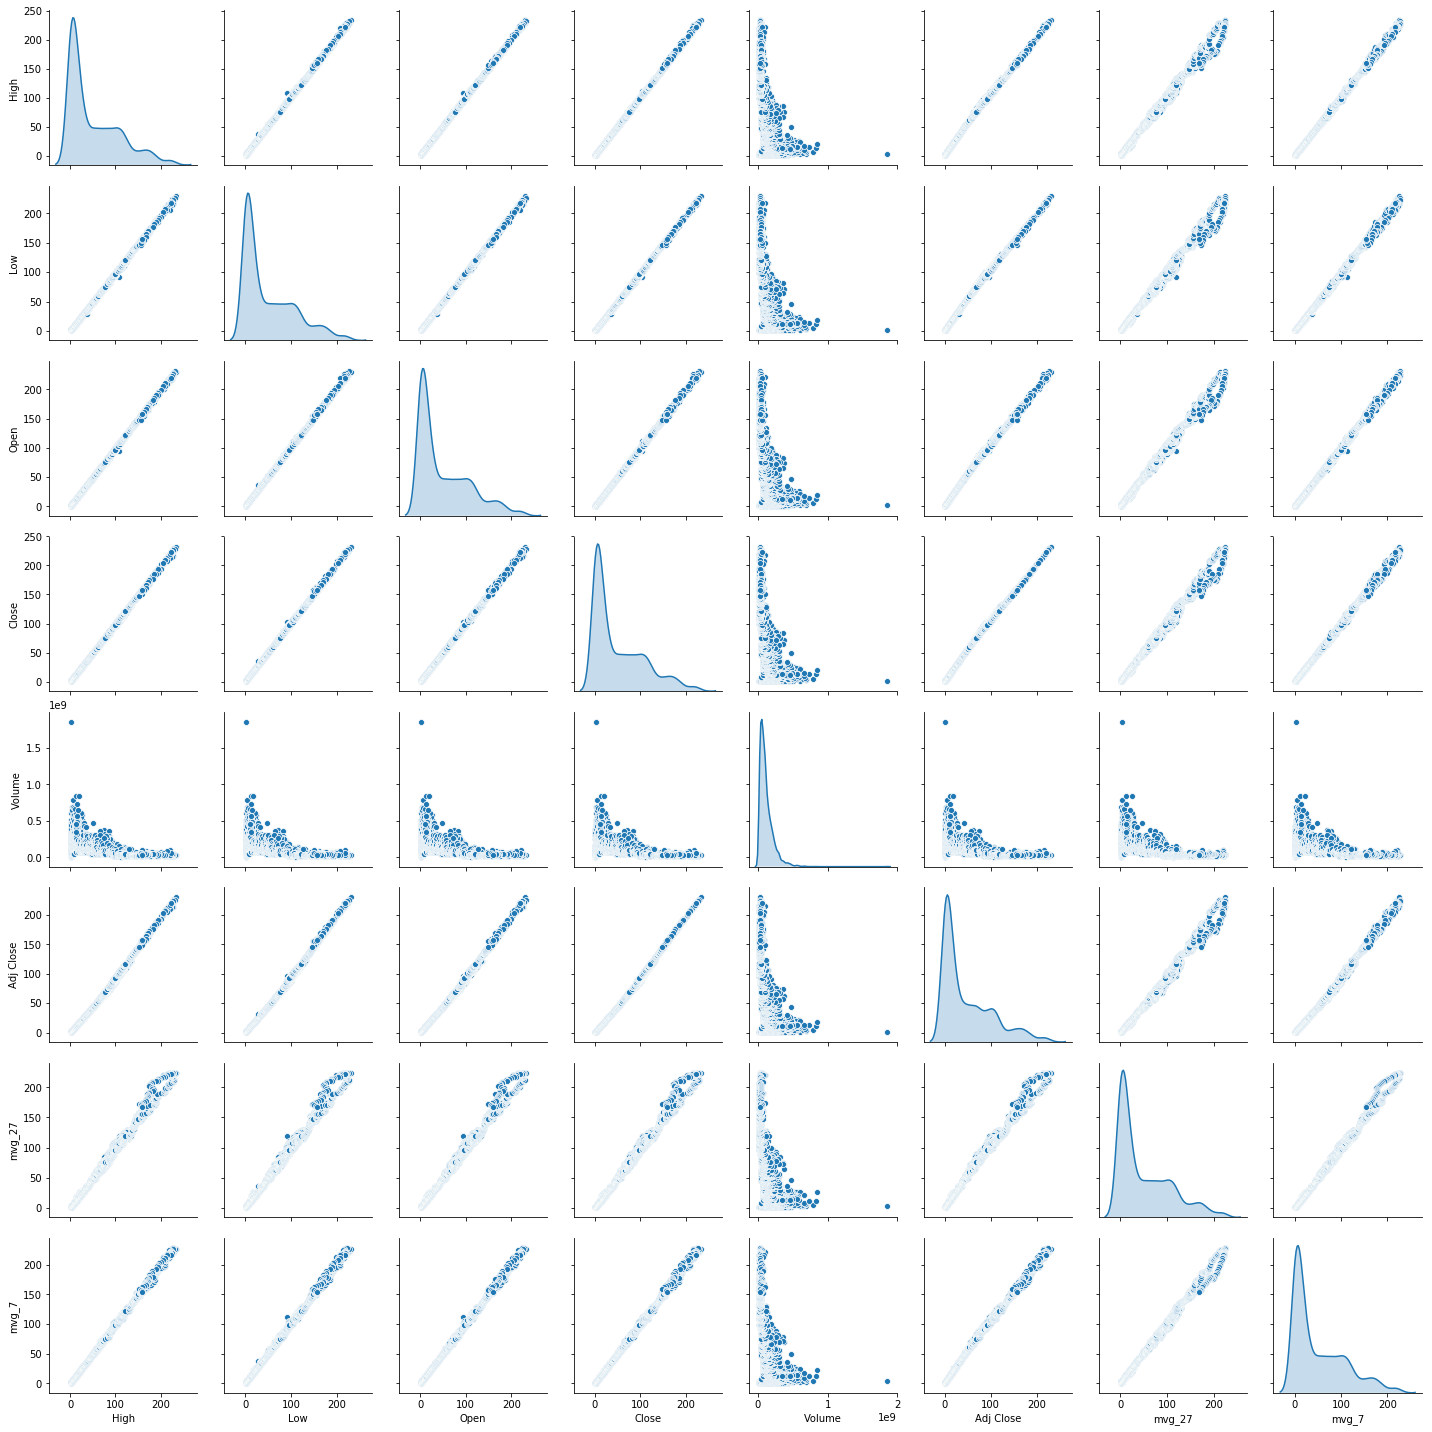

In [62]:
sns.pairplot(data,diag_kind="kde")

In [63]:
data[['Close','mvg_27','mvg_7']].iplot()

In [64]:
data['Volume'].iplot()

In [10]:
returns = 100 * data['Close'].pct_change().dropna()
am = arch_model(returns)

In [11]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2405.862935557536
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2405.014699309758
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2404.626889085777
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2404.321657835105
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2404.3154985367028
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2404.05059265095
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2404.043166535297
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2404.041137734286
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2404.0409728922627
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2404.040939094599
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2404.0409390937166
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


In [12]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2404.04
Distribution:                  Normal   AIC:                           4816.08
Method:            Maximum Likelihood   BIC:                           4836.63
                                        No. Observations:                 1257
Date:                Thu, Jul 11 2019   Df Residuals:                     1253
Time:                        12:02:12   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1812  5.023e-02      3.607  3.103e-04 [8.271e-0

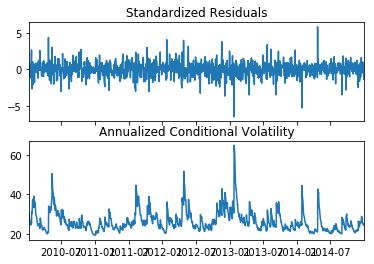

In [13]:
fig = res.plot(annualize='D')

Text(0.5, 0, 'Risque (ecart-type)')

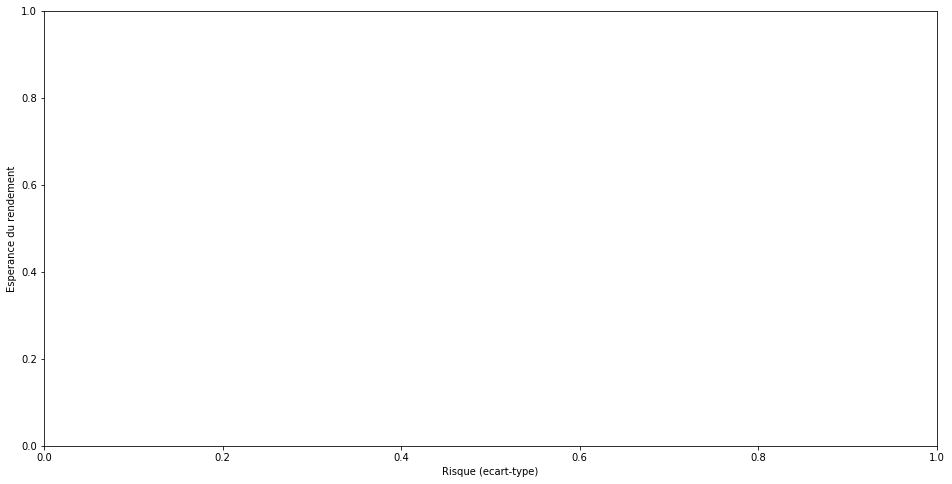

In [31]:
plt.rcParams['figure.figsize'] = (16, 8)

plt.ylabel("Esperance du rendement")
plt.xlabel("Risque (ecart-type)")

#### Ratio de sharp

In [32]:
E_r_p = 0.10
r_f = 0.02
sigma_p = 0.20

In [33]:
a = (E_r_p - r_f) / sigma_p
b = r_f
sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)
E_r_p_list = [a * x + b for x in sigma_p_list]

In [34]:
sigma_p_list

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39])

Text(0.5, 0, 'Risque (ecart-type)')

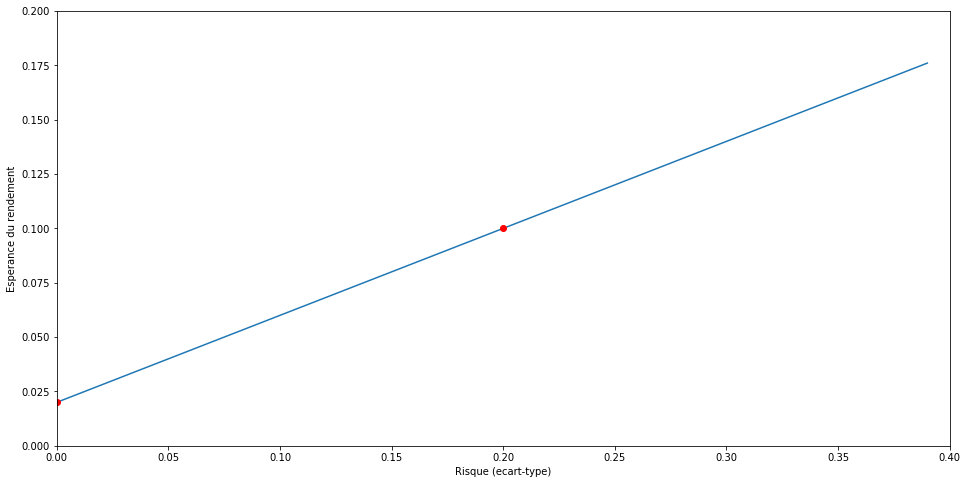

In [37]:
plt.plot(sigma_p_list, E_r_p_list)
plt.plot([0, sigma_p], [r_f, E_r_p], 'ro')

plt.axis([0, 2 * sigma_p, 0, 2 * E_r_p])
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')

In [38]:
E_r_p = 0.10
r_f = 0.02
sigma_p = 0.20
U = r_f
sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)

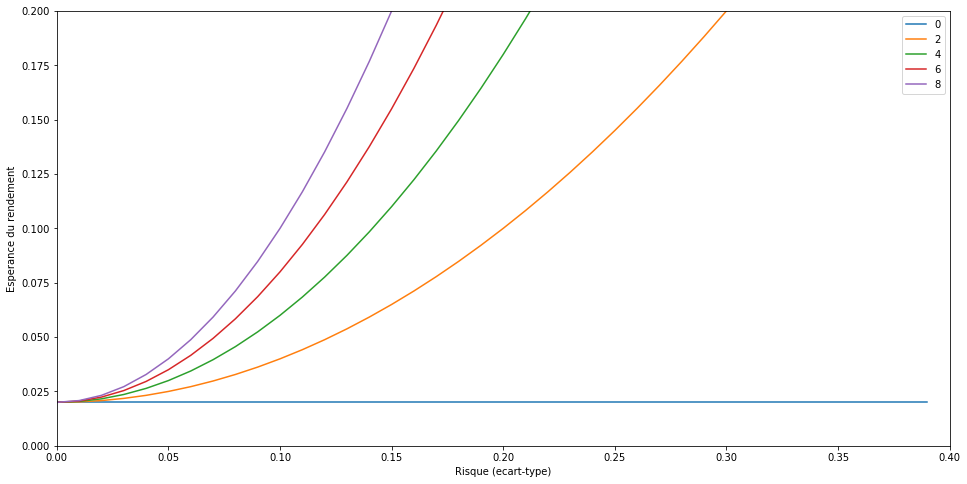

In [45]:
for A_n in np.arange(0, 10, 2):
    A_n_list = [U + A_n * x ** (2) for x in sigma_p_list]
    plt.plot(sigma_p_list, A_n_list, label=A_n)

plt.axis([0, 2 * sigma_p, 0, 2 * E_r_p])
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')
plt.legend()